## Introduction to Classification

### Load the data
The first thing to install is imblearn. This is a Scikit-learn package that will allow you to better balance the data.

1. Prepare the data

In [60]:
# Load the data
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from imblearn.over_sampling import SMOTE

cuisines = pd.read_csv('../data/cuisines.csv')
cuisines.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Visualization
After preparing the data, plot the data using bar chart.

2. Visualize the data

    cuisine  count
0    korean    799
1    indian    598
2   chinese    442
3  japanese    320
4      thai    289


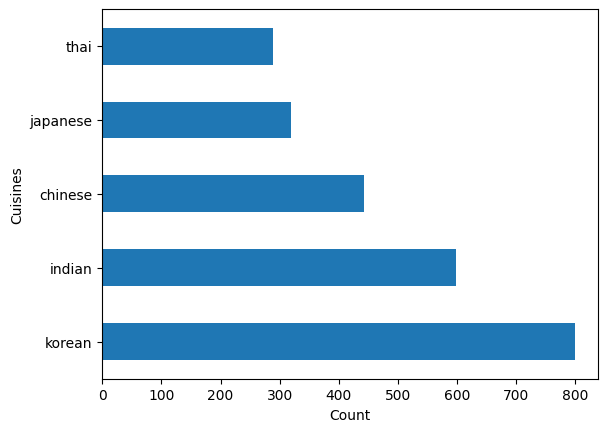

In [61]:
# Create series of cuisine
type_count = cuisines['cuisine'].value_counts()
type_count.plot(kind="barh")

# Plot the data
plt.xlabel("Count")
plt.ylabel("Cuisines")

print(cuisines['cuisine'].value_counts().reset_index())


### Pre-processing
Pre-process the datasets to use in the training.

3. Create dataframe

In [62]:
# Create a function to form the dataframe
def create_new_df(df):
    value = df.T[2:].sum(axis=1)
    new_df = pd.DataFrame(
        {'Value': value}
    )
    new_df = new_df[new_df['Value'] != 0].sort_values(by='Value', ascending=False)
    return new_df

4. Call the function and plot a bar chart

<Axes: >

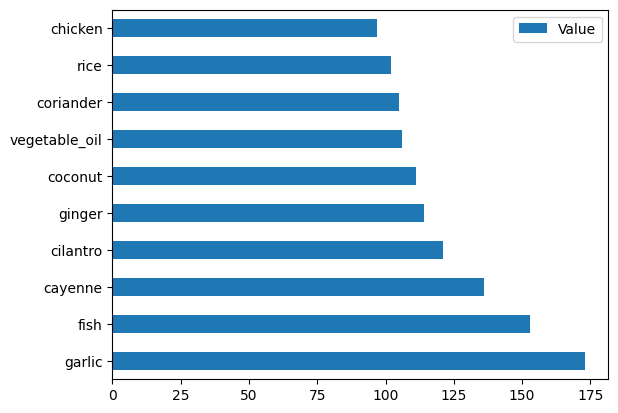

In [63]:
thai_df = create_new_df(cuisines[cuisines['cuisine'].str.contains("thai")])
thai_df.head(10).plot(kind='barh')

### Balancing

5. Balance the data
Balance the data use "Synthetic Minority Over-sampling Technique".

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any invalid data out.

In [64]:
# Balance the data
oversample = SMOTE()
drop_column = ['cuisine', 'Unnamed: 0']
features_df = cuisines.drop(drop_column, axis=1)
labels_df = cuisines['cuisine']
tf_features, tf_labels = oversample.fit_resample(features_df, labels_df)

print('New label data: ', tf_labels.value_counts())
print('Olad label data: ', labels_df.value_counts())

New label data:  cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
Olad label data:  cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


/usr/local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


6. Save the data
   
The last step is to save your balanced data into a new dataframe.

In [65]:
# Form a new dataframe
tf_df = pd.concat([tf_labels, tf_features], axis=1, join='outer')
tf_df.to_csv('../data/balanced_cuisines.csv')